In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
imgs0=torch.tensor(np.load('/vols/solid/shingo/data/hyperk_img/eminus_img2d_small.npy').astype(np.float32))
imgs1=torch.tensor(np.load('/vols/solid/shingo/data/hyperk_img/muminus_img2d_small.npy').astype(np.float32))
targets0=torch.tensor(np.load('/vols/solid/shingo/data/hyperk_img/eminus_target_small.npy').astype(np.float32))
targets1=torch.tensor(np.load('/vols/solid/shingo/data/hyperk_img/muminus_target_small.npy').astype(np.float32))

labels0 = torch.tensor(np.full(imgs0.shape[0], 0, np.int64))
labels1 = torch.tensor(np.full(imgs1.shape[0], 1, np.int64))

In [3]:
factors = {'img':None, 'targets':None}

In [4]:
imgs = torch.concatenate([imgs0,imgs1],axis=0)
mean = [imgs[:,0,:,:].mean(), imgs[:,1,:,:].mean()]
std = [imgs[:,0,:,:].std(), imgs[:,1,:,:].std()]
imgs[:,0,:,:] = (imgs[:,0,:,:]-mean[0])/std[0] #ch0:charge
imgs[:,1,:,:] = (imgs[:,1,:,:]-mean[1])/std[1] #ch1:time
#max = [imgs[:,0,:,:].max(), imgs[:,1,:,:].max()]
#imgs[:,0,:,:] /= max[0]
#imgs[:,1,:,:] /= max[1]

# ['img'] = {'mean':mean, 'std':std, 'max':max}
factors['img'] = {'mean':mean, 'scale':std}

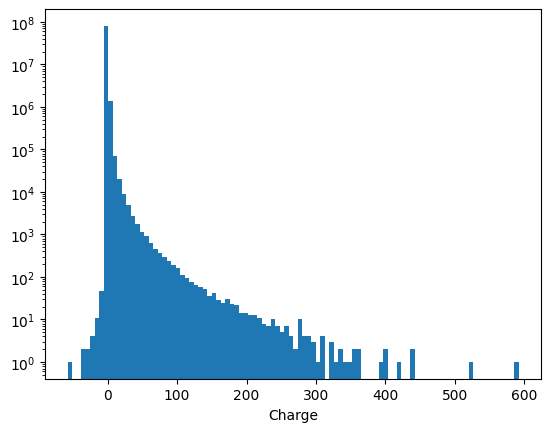

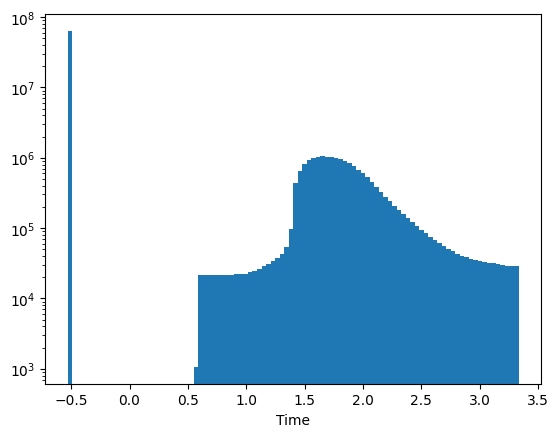

In [5]:
plt.hist(imgs[:,0,:,:].flatten(), bins=100)
plt.xlabel('Charge')
plt.yscale('log')
plt.show()

plt.hist(imgs[:,1,:,:].flatten(), bins=100)
plt.xlabel('Time')
plt.yscale('log')
plt.show()

In [6]:
targets = torch.concatenate([targets0, targets1], axis=0)
mean = targets.mean(axis=0)
targets -= mean
#std = targets.std(axis=0)
#targets = (targets-mean)/std
scale = targets.max(axis=0)[0]*2.
targets /= scale

#factors['targets'] = {'mean':mean, 'std':std, 'max':max}
factors['targets'] = {'mean':mean, 'scale':scale}

In [7]:
labels = torch.concatenate([labels0, labels1],axis=0)
labels_targets = torch.concatenate([labels.reshape(-1,1), targets], axis=1)

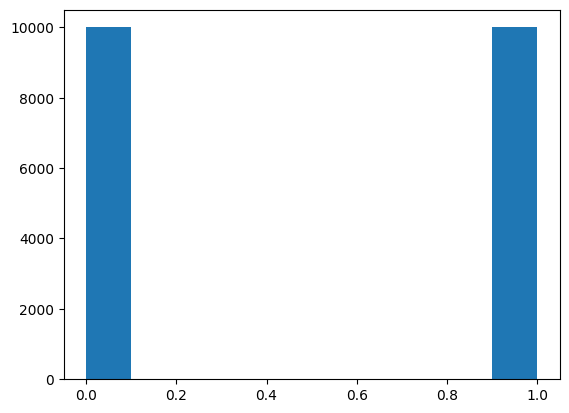

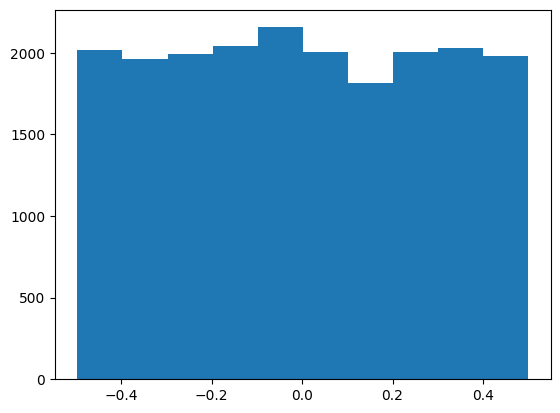

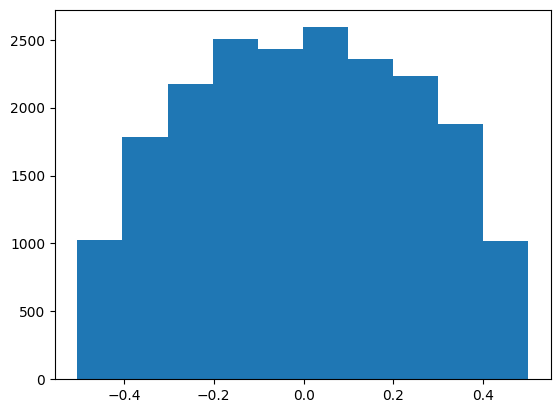

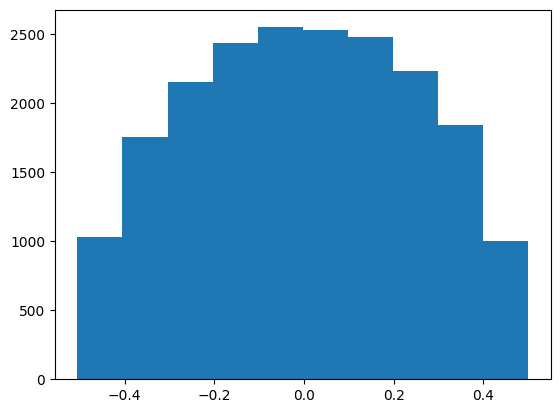

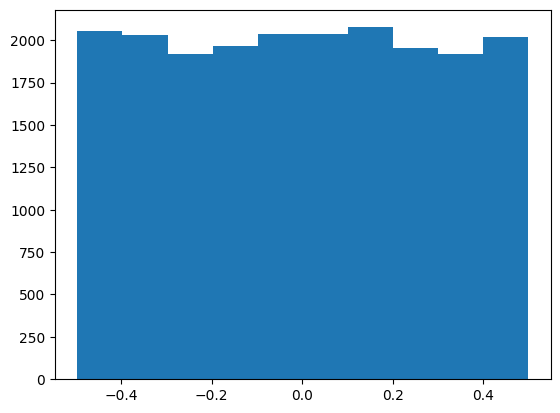

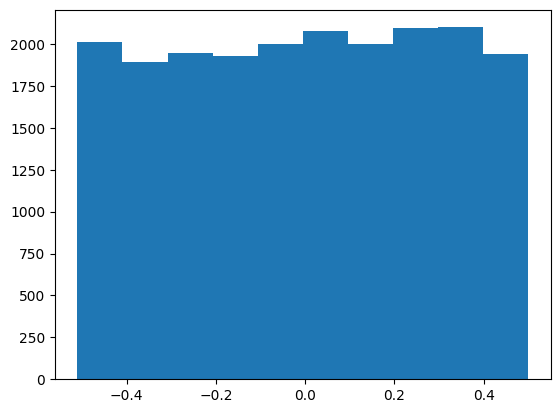

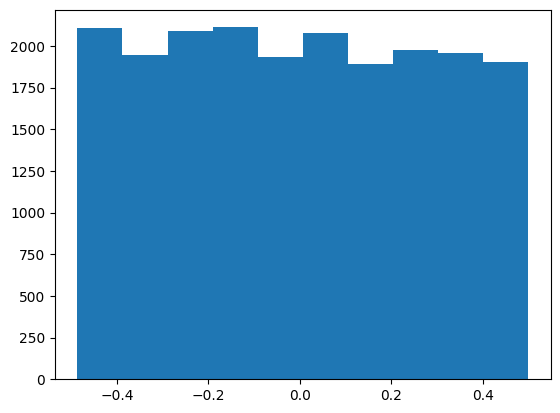

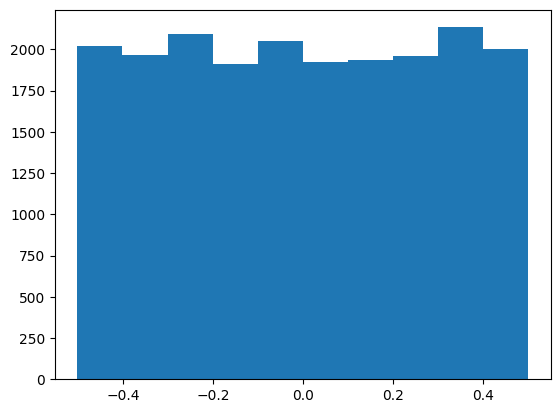

In [8]:
for i in range(labels_targets.shape[1]):
    plt.hist(labels_targets[:,i].flatten())
    #plt.xlabel('Particle type')
    plt.show()


In [9]:
n_train = 10000/2
n_valid = 5000/2
n_test = 5000/2

idx_split = imgs0.shape[0] #label0/label1


In [10]:
ids=torch.tensor(np.arange(imgs.shape[0]))

select = (ids<n_train) | ((ids>=idx_split)&(ids<(idx_split+n_train)))
ids_train = ids[select]

select = ((ids>=(n_train))&(ids<(n_train+n_valid))) | ((ids>=(idx_split+n_train))&(ids<(idx_split+n_train+n_valid)))
ids_valid = ids[select]

select = ((ids>=(n_train+n_valid))&(ids<(n_train+n_valid+n_test))) | ((ids>=(idx_split+n_train+n_valid))&(ids<(idx_split+n_train+n_valid+n_test)))
ids_test = ids[select]

indices = {'idx_split':idx_split, 'train':ids_train, 'valid':ids_valid, 'test':ids_test}

In [11]:
torch.save(imgs, '/vols/solid/shingo/data/hyperk_img/imgs_scaled.pt')
torch.save(labels_targets, '/vols/solid/shingo/data/hyperk_img/labels_targets_scaled.pt')
torch.save(indices, '/vols/solid/shingo/data/hyperk_img/indices.pt')
torch.save(factors, '/vols/solid/shingo/data/hyperk_img/mean_scale.pt')